In [1]:
import os
import pyemu
import numpy as np
import matplotlib.pyplot as plt
from a_setup import *

MODEL_NAME = 'local1'
# set working directory
os.chdir(r'C:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build')

In [2]:
m_d = os.path.join(TEMP_DIR, '..', 'master_local')
pst_name = f'{MODEL_NAME}.pst'
pst = pyemu.Pst(os.path.join(TEMP_DIR, pst_name))

In [3]:
#read the Jacobian matrix
jco = pyemu.Jco.from_binary(os.path.join(m_d,pst_name.replace(".pst",".jcb")))
jco_df = jco.to_dataframe()
# inspect the matrix as a dataframe
jco_df = jco_df.loc[pst.nnz_obs_names,:]
jco_df.head()

,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:25_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:35_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:45_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:55_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:15_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:25_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:35_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:45_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:55_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:25_j:5_zone:1,...,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:37_idx2:9,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:38_idx2:1,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:38_idx2:8,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:2,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:3,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:4,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:5,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:6,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:7,pname:drn_riv_condcn_inst:0_ptype:cn_usecol:4_pstyle:m
oname:cum_otype:lst_usecol:drn_totim:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.323971,-1.851263e-01,0.347112,0.370253,0.000000,0.254549,0.092563,0.509097,-0.023141,-9682.268210
oname:cum_otype:lst_usecol:rcha_totim:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
oname:cum_otype:lst_usecol:wel2_totim:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
oname:cum_otype:lst_usecol:wel_totim:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
oname:springobs_otype:lst_usecol:pk2_head_kper:0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000560,7.599700e-07,-0.000504,-0.000591,-0.000101,-0.000402,-0.000195,-0.000645,-0.000015,4.746569


In [4]:
# instantiate schur
sc = pyemu.Schur(jco=os.path.join(m_d, pst_name.replace(".pst",".jcb")))

# calcualte the parameter CSS
css_df = sc.get_par_css_dataframe()
css_df.sort_values(by='pest_css', ascending=False).head()

,pest_css,hill_css
pname:mbr_cond_condcn_inst:0_ptype:cn_usecol:3_pstyle:m,12.411852,0.0
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:19_idx2:30,8.643045,0.0
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:17_idx2:27,8.638601,0.0
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:16_idx2:26,8.636155,0.0
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:28_idx2:31,8.634895,0.0


In [5]:
css_df['grp_name'] = css_df.index.map(lambda x: x.split(':')[1][:-5])

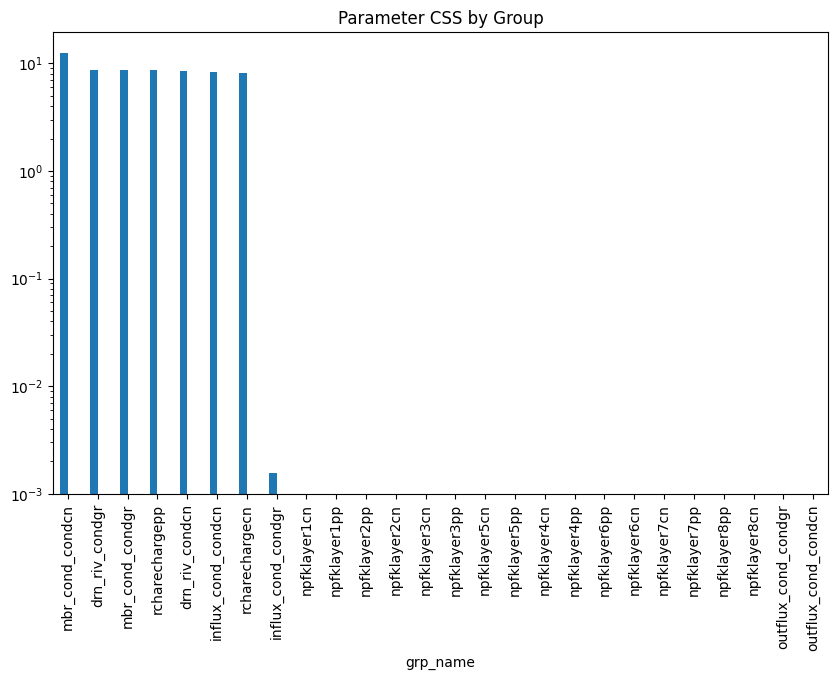

In [6]:
ax = css_df.groupby('grp_name').max().sort_values(by='pest_css', ascending=False).plot.bar(
    figsize=(10, 6), legend=False, title='Parameter CSS by Group', color='C0')
ax.set_yscale('log')

In [7]:
# open csv
import pandas as pd
pd.read_csv(r"C:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\examples\manual_builds\models\local1\pest\master_mc\local1.phi.group.csv").T

,0
iteration,0
total_runs,1
obs_realization,base
par_realization,base
oname:cum_otype:lst_usecol:chd2,0
cum,0
oname:cum_otype:lst_usecol:drn,10.8148
oname:cum_otype:lst_usecol:in-out,0
oname:cum_otype:lst_usecol:percent-discrepancy,0
oname:cum_otype:lst_usecol:rcha,3.79617


In [8]:
covar = pyemu.Cov(sc.xtqx.x, names=sc.xtqx.row_names)
covar.df().head()

,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:25_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:35_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:45_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:55_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:15_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:25_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:35_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:45_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:55_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:25_j:5_zone:1,...,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:37_idx2:9,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:38_idx2:1,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:38_idx2:8,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:2,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:3,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:4,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:5,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:6,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:7,pname:drn_riv_condcn_inst:0_ptype:cn_usecol:4_pstyle:m
pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:25_zone:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:35_zone:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:45_zone:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:55_zone:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:15_zone:1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


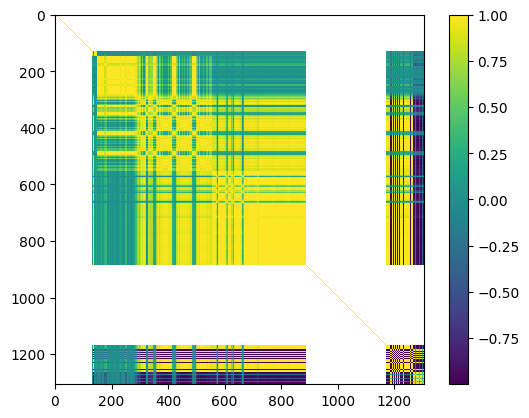

In [9]:
R = covar.to_pearson()
plt.imshow(R.df(), interpolation='nearest', cmap='viridis')
plt.colorbar()

In [10]:
cpar = R.df().index[500]
print(cpar)
R.df().loc[cpar][np.abs(R.df().loc[cpar])>.8]

pname:mbr_cond_condgr_inst:0_ptype:gr_usecol:3_pstyle:m_idx0:5_idx1:23_idx2:40


pname:rcharechargepp_inst:0_ptype:pp_pstyle:m_i:15_j:15_zone:1                  0.830752
pname:rcharechargepp_inst:0_ptype:pp_pstyle:m_i:25_j:5_zone:1                   0.830753
pname:rcharechargepp_inst:0_ptype:pp_pstyle:m_i:25_j:15_zone:1                  0.830753
pname:rcharechargepp_inst:0_ptype:pp_pstyle:m_i:35_j:5_zone:1                   0.830754
pname:rcharechargecn_inst:0_ptype:cn_pstyle:m                                   0.830157
                                                                                  ...   
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:4   -0.830279
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:5   -0.830096
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:6   -0.830473
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:7   -0.824752
pname:drn_riv_condcn_inst:0_ptype:cn_usecol:4_pstyle:m                          0.830686
Name: pname:mbr_cond_

In [11]:
cov_df = R.df()

In [12]:
cov_df[abs(cov_df.values) > 0.95]

,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:25_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:35_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:45_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:55_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:15_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:25_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:35_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:45_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:55_zone:1,pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:25_j:5_zone:1,...,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:37_idx2:9,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:38_idx2:1,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:38_idx2:8,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:2,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:3,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:4,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:5,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:6,pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:7,pname:drn_riv_condcn_inst:0_ptype:cn_usecol:4_pstyle:m
pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:25_zone:1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:35_zone:1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:45_zone:1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:5_j:55_zone:1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pname:npfklayer1pp_inst:0_ptype:pp_pstyle:m_i:15_j:15_zone:1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pname:drn_riv_condcn_inst:0_ptype:cn_usecol:4_pstyle:m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.999841,-0.384137,-0.999909,-0.99987,-0.999503,-0.999864,-0.999787,-0.999923,-0.9957,1.0
pname:drn_riv_condcn_inst:0_ptype:cn_usecol:4_pstyle:m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.999841,-0.384137,-0.999909,-0.99987,-0.999503,-0.999864,-0.999787,-0.999923,-0.9957,1.0
pname:drn_riv_condcn_inst:0_ptype:cn_usecol:4_pstyle:m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.999841,-0.384137,-0.999909,-0.99987,-0.999503,-0.999864,-0.999787,-0.999923,-0.9957,1.0
pname:drn_riv_condcn_inst:0_ptype:cn_usecol:4_pstyle:m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.999841,-0.384137,-0.999909,-0.99987,-0.999503,-0.999864,-0.999787,-0.999923,-0.9957,1.0


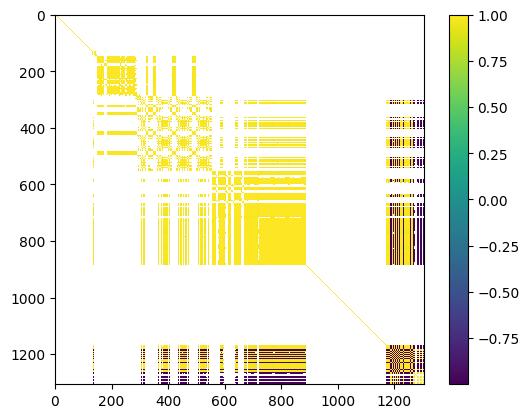

In [13]:
R_plot = R.as_2d.copy()
R_plot[np.abs(R_plot)<0.95] = np.nan
plt.imshow(R_plot, interpolation='nearest', cmap='viridis')
plt.colorbar();

In [14]:
import flopy

# import the model
sim = flopy.mf6.MFSimulation.load(sim_ws=TEMP_DIR)
gwf = sim.get_model(MODEL_NAME)


loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package npf...
    loading package ic...
    loading package rch...
    loading package drn...
    loading package chd...
    loading package chd...
    loading package wel...
    loading package wel...
    loading package wel...
    loading package oc...
  loading solution package local1...


In [15]:
iarr = gwf.dis.idomain.get_data()
iarr.shape

(8, 50, 61)

In [16]:
import numpy as np
# 1 - subset the df with just drn_riv_cond
css_df = css_df.loc[css_df.index.str.contains('drn_riv_condgr')]
css_df

,pest_css,hill_css,grp_name
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:2_idx2:47,0.000050,0.0,drn_riv_condgr
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:2_idx2:59,0.000191,0.0,drn_riv_condgr
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:2_idx2:60,0.000167,0.0,drn_riv_condgr
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:3_idx2:46,8.060639,0.0,drn_riv_condgr
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:3_idx2:57,8.613544,0.0,drn_riv_condgr
...,...,...,...
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:3,0.000184,0.0,drn_riv_condgr
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:4,0.000726,0.0,drn_riv_condgr
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:5,0.000353,0.0,drn_riv_condgr
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:6,0.001162,0.0,drn_riv_condgr


In [17]:
# idx0:0_idx1:39_idx2:7 split this into (0, 39, 7)
css_df['k'] = css_df.index.map(lambda x: int(x.split('_')[-3].split(':')[-1]))
css_df['i'] = css_df.index.map(lambda x: int(x.split('_')[-2].split(':')[-1]))
css_df['j'] = css_df.index.map(lambda x: int(x.split('_')[-1].split(':')[-1]))
css_df

,pest_css,hill_css,grp_name,k,i,j
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:2_idx2:47,0.000050,0.0,drn_riv_condgr,0,2,47
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:2_idx2:59,0.000191,0.0,drn_riv_condgr,0,2,59
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:2_idx2:60,0.000167,0.0,drn_riv_condgr,0,2,60
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:3_idx2:46,8.060639,0.0,drn_riv_condgr,0,3,46
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:3_idx2:57,8.613544,0.0,drn_riv_condgr,0,3,57
...,...,...,...,...,...,...
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:3,0.000184,0.0,drn_riv_condgr,0,39,3
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:4,0.000726,0.0,drn_riv_condgr,0,39,4
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:5,0.000353,0.0,drn_riv_condgr,0,39,5
pname:drn_riv_condgr_inst:0_ptype:gr_usecol:4_pstyle:m_idx0:0_idx1:39_idx2:6,0.001162,0.0,drn_riv_condgr,0,39,6


In [18]:
drn_css = np.ones_like(iarr) * 0
drn_css_bool = np.ones_like(iarr) * 0

# set the values in the array
for idx, row in css_df.iterrows():
    val = row['pest_css']
    drn_css_bool[int(row['k']), int(row['i']), int(row['j'])] = 1
    if val > 0.0:
        # set the value in the array
        drn_css[int(row['k']), int(row['i']), int(row['j'])] = val

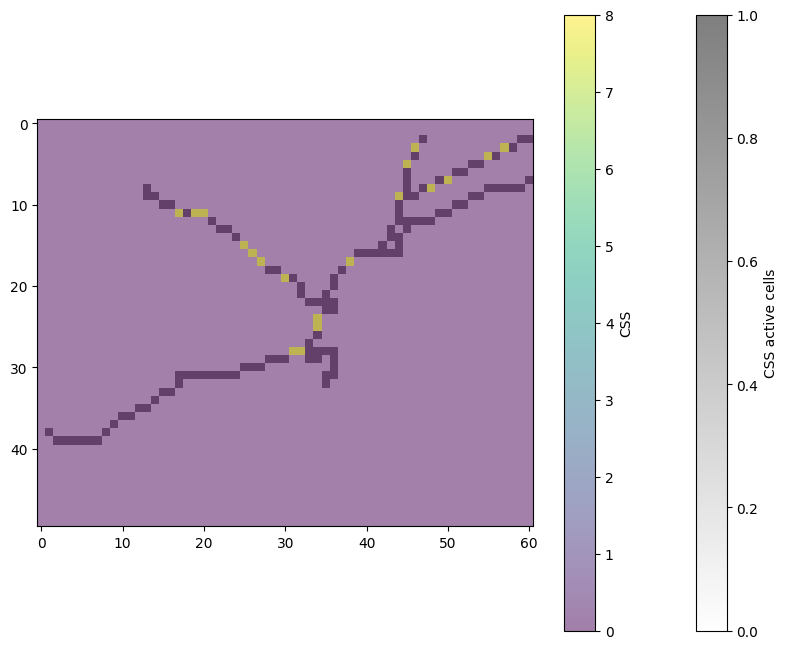

In [19]:
# plot the CSS
plt.figure(figsize=(10, 8))
plt.imshow(drn_css_bool[0, :, :], cmap='binary', alpha=0.5)
plt.colorbar(label='CSS active cells')
plt.imshow(drn_css[0, :, :], cmap='viridis', alpha=0.5)
plt.colorbar(label='CSS')

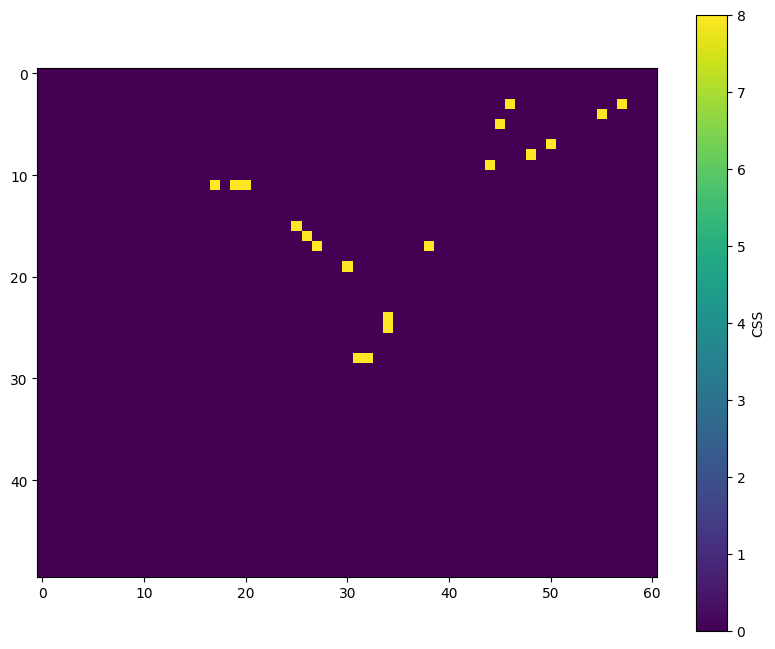

In [20]:
# plot the CSS
plt.figure(figsize=(10, 8))
plt.imshow(drn_css[0, :, :], cmap='viridis')
plt.colorbar(label='CSS')

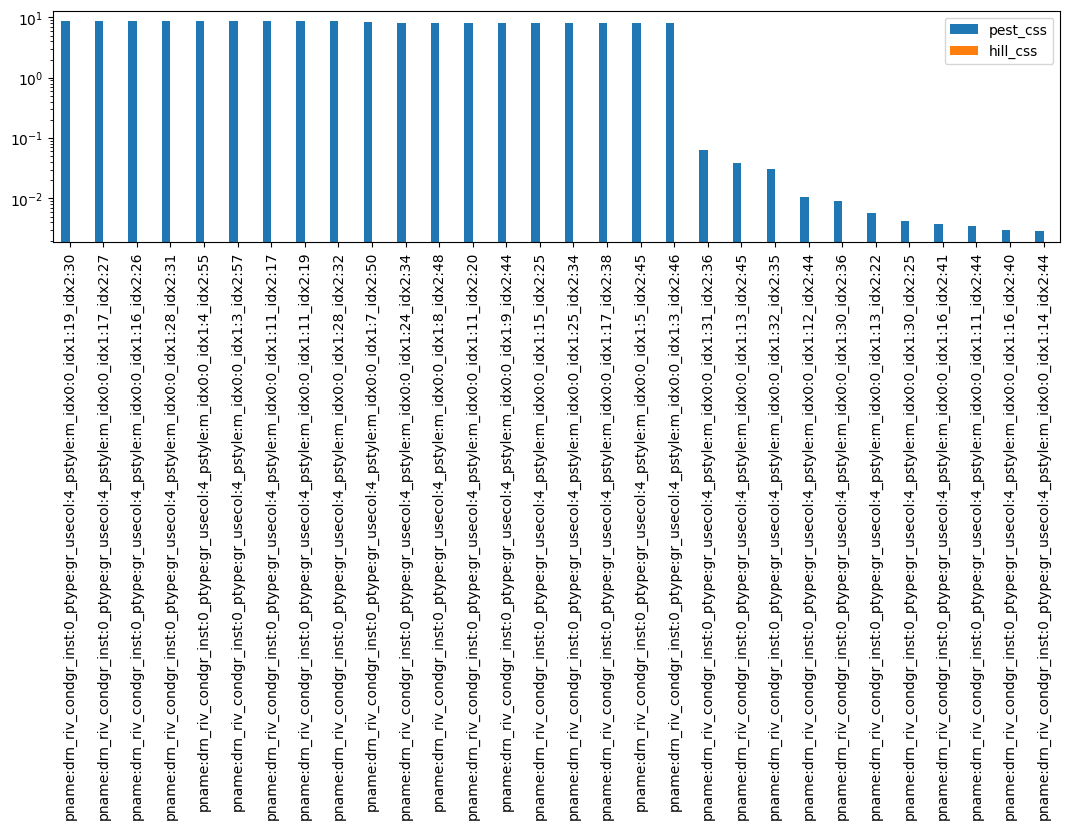

In [21]:
css_df[['pest_css', 'hill_css']].sort_values(by='pest_css', ascending=False).head(30).plot(kind='bar', figsize=(13,3))
plt.yscale('log')

## Identifiability

In [22]:
ev = pyemu.ErrVar(jco=os.path.join(m_d,pst_name.replace(".pst",".jcb")))

In [23]:
pst.nnz_obs

11

In [24]:
singular_value= 11

id_df = ev.get_identifiability_dataframe(singular_value=singular_value).sort_values(by='ident', ascending=False)
id_df.head()

,right_sing_vec_1,right_sing_vec_2,right_sing_vec_3,right_sing_vec_4,right_sing_vec_5,right_sing_vec_6,right_sing_vec_7,right_sing_vec_8,right_sing_vec_9,right_sing_vec_10,right_sing_vec_11,ident
pname:mbr_cond_condcn_inst:0_ptype:cn_usecol:3_pstyle:m,1.605701e-02,9.819002e-01,0.000005,0.000016,0.000003,0.000008,2.075414e-05,1.434343e-08,4.898905e-07,1.477264e-07,4.165645e-09,0.998010
pname:influx_cond_condcn_inst:0_ptype:cn_usecol:3_pstyle:m,8.202123e-03,1.813073e-04,0.000048,0.037319,0.913951,0.037278,5.711282e-07,1.726330e-09,6.841902e-09,7.494314e-10,6.146437e-08,0.996980
pname:rcharechargecn_inst:0_ptype:cn_pstyle:m,7.676848e-03,1.701955e-04,0.933233,0.000159,0.000008,0.000030,3.440955e-04,3.512172e-04,3.625110e-05,1.119508e-03,1.074713e-03,0.944203
pname:rcharechargepp_inst:0_ptype:pp_pstyle:m_i:5_j:35_zone:1,6.824414e-10,7.922085e-11,0.003355,0.000010,0.000022,0.000493,3.251273e-05,5.789298e-01,3.855931e-04,1.667276e-01,3.049863e-03,0.753005
pname:drn_riv_condcn_inst:0_ptype:cn_usecol:4_pstyle:m,8.570700e-03,2.020103e-04,0.000379,0.639962,0.046021,0.046917,2.096680e-04,7.344466e-05,2.865757e-07,4.287914e-04,7.720239e-06,0.742771


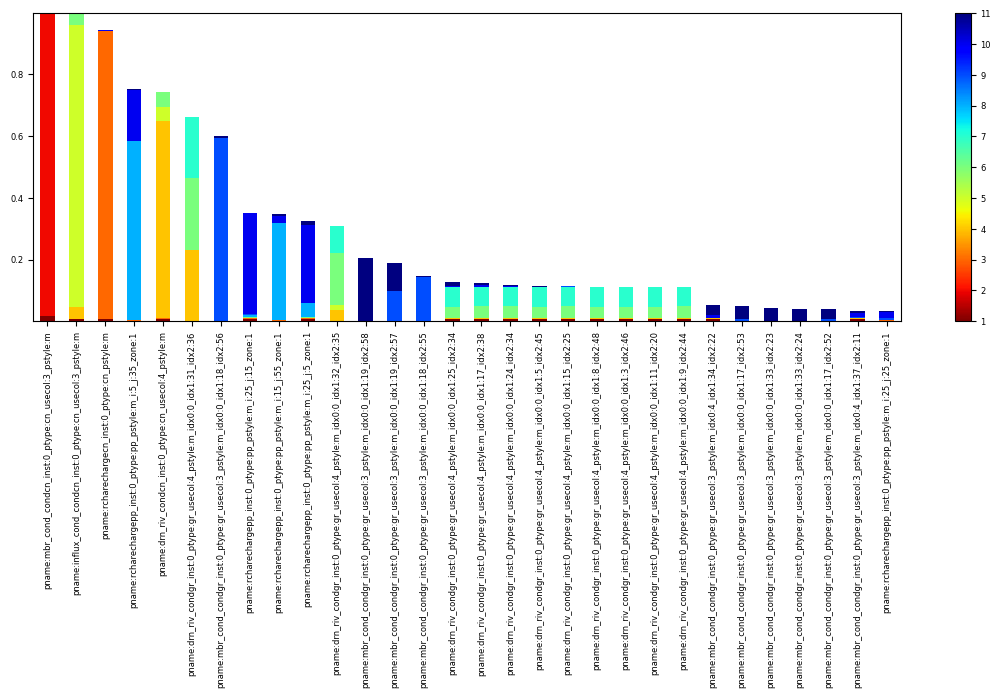

In [25]:
id = pyemu.plot_utils.plot_id_bar(id_df.head(30), figsize=(14,4))

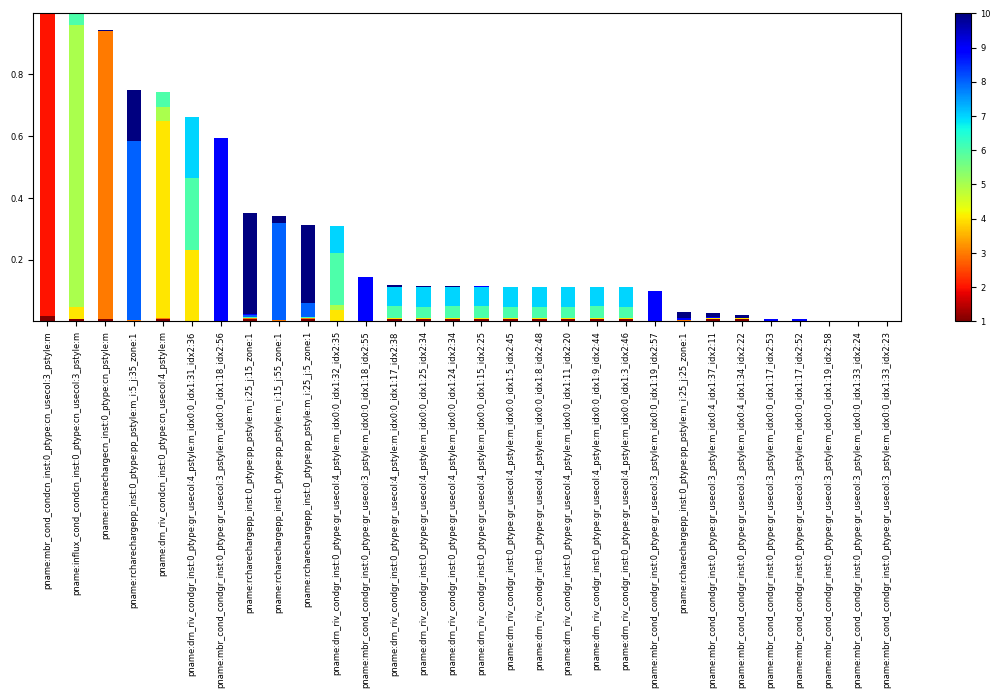

In [26]:
id = pyemu.plot_utils.plot_id_bar(id_df.head(30), nsv=10, figsize=(14,4))

# OBS stuff

In [27]:
obs = pst.observation_data

# generate cov matrix for all obs using weights in the control file
obs_cov = pyemu.Cov.from_observation_data(pst, )

# reduce cov down to only include non-zero obsverations
obs_cov = obs_cov.get(row_names=pst.nnz_obs_names, col_names=pst.nnz_obs_names, )

# side note: 
# we are saving the diagonal (e.g no correlation) obsevration uncertainty cov matrix
# to an external file for use in a later tutorial
obs_cov.to_coo(os.path.join(r'C:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\examples\manual_builds\models\local1\pest\local1_template',"obs_cov_diag.jcb"))

# make it a dataframe to make life easier
df = obs_cov.to_dataframe()

df.head()

c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\mat\mat_handler.py:1899: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.records.


,oname:cum_otype:lst_usecol:drn_totim:1,oname:cum_otype:lst_usecol:rcha_totim:1,oname:cum_otype:lst_usecol:wel2_totim:1,oname:cum_otype:lst_usecol:wel_totim:1,oname:springobs_otype:lst_usecol:pk2_head_kper:0,oname:springobs_otype:lst_usecol:pk4_head_kper:0,oname:springobs_otype:lst_usecol:pk4_pk2_diff_kper:0,oname:springobs_otype:lst_usecol:spring_flux_kper:0,oname:springobs_otype:lst_usecol:spring_head_kper:0,oname:springobs_otype:lst_usecol:spring_pk2_diff_kper:0,oname:springobs_otype:lst_usecol:spring_pk4_diff_kper:0
oname:cum_otype:lst_usecol:drn_totim:1,1.456792e+09,0.00000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
oname:cum_otype:lst_usecol:rcha_totim:1,0.000000e+00,4890.21468,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
oname:cum_otype:lst_usecol:wel2_totim:1,0.000000e+00,0.00000,683013.455365,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0
oname:cum_otype:lst_usecol:wel_totim:1,0.000000e+00,0.00000,0.000000,1693.508781,0.00,0.0,0.0,0.0,0.0,0.0,0.0
oname:springobs_otype:lst_usecol:pk2_head_kper:0,0.000000e+00,0.00000,0.000000,0.000000,0.01,0.0,0.0,0.0,0.0,0.0,0.0


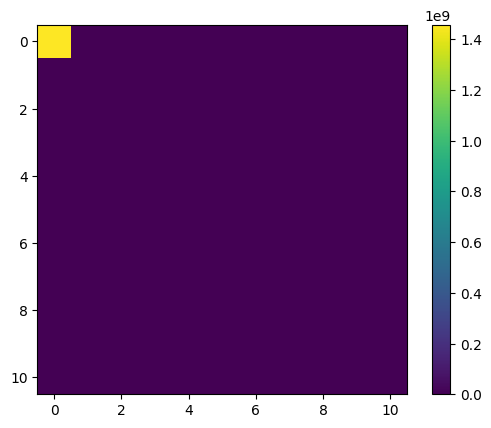

In [28]:
plt.imshow(df.values)
plt.colorbar()

In [29]:
obs_cov_tv = pyemu.Cov.from_dataframe(df)
obs_cov_tv.to_coo(os.path.join(r'C:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\examples\manual_builds\models\local1\pest\local1_template',"obs_cov.jcb"))

c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\mat\mat_handler.py:1899: DeprecationWarning: numpy.core is deprecated and has been renamed to numpy._core. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.records.


In [30]:
oe_tv = pyemu.ObservationEnsemble.from_gaussian_draw(pst=pst, 
                                                num_reals=50,
                                                cov=obs_cov_tv) 

drawing from group oname:cum_otype:lst_usecol:drn
drawing from group oname:cum_otype:lst_usecol:rcha
drawing from group oname:cum_otype:lst_usecol:wel
drawing from group oname:cum_otype:lst_usecol:wel2
drawing from group oname:springobs_otype:lst_usecol:pk2_head
drawing from group oname:springobs_otype:lst_usecol:pk4_head
drawing from group oname:springobs_otype:lst_usecol:pk4_pk2_diff
drawing from group oname:springobs_otype:lst_usecol:spring_flux
drawing from group oname:springobs_otype:lst_usecol:spring_pk2_diff
drawing from group oname:springobs_otype:lst_usecol:spring_pk4_diff
drawing from group springobs


# MC prep

In [31]:
import pandas as pd
import os
import pyemu
import matplotlib.pyplot as plt

from a_setup import *

m_d = r"C:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\examples\manual_builds\models\local1\pest\master_mc"

df_out = pd.read_csv(os.path.join(m_d,"sweep_out.csv"),index_col=0)
df_out = df_out.loc[df_out.failed_flag==0,:] #drop any failed runs
df_out = df_out.loc[~df_out.le(-2.e27).any(axis=1)] #drop extreme values
df_out.columns = [c.lower() for c in df_out.columns]
df_out.head()

,input_run_id,failed_flag,phi,meas_phi,regul_phi,oname:cum_otype:lst_usecol:chd2,cum,oname:cum_otype:lst_usecol:drn,oname:cum_otype:lst_usecol:in-out,oname:cum_otype:lst_usecol:percent-discrepancy,...,oname:cum_otype:lst_usecol:wel2_totim:1,oname:cum_otype:lst_usecol:wel3_totim:1,oname:cum_otype:lst_usecol:wel_totim:1,oname:springobs_otype:lst_usecol:pk2_head_kper:0,oname:springobs_otype:lst_usecol:pk4_head_kper:0,oname:springobs_otype:lst_usecol:pk4_pk2_diff_kper:0,oname:springobs_otype:lst_usecol:spring_flux_kper:0,oname:springobs_otype:lst_usecol:spring_head_kper:0,oname:springobs_otype:lst_usecol:spring_pk2_diff_kper:0,oname:springobs_otype:lst_usecol:spring_pk4_diff_kper:0
run_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,81979.541834,81979.541834,0,0,0,10.188174,0,0,...,2108.9487,2.82,3298.5034,10.887757,10.415061,-0.472696,-82.293803,6.046576,-4.841180,-4.368485
1,1,0,282391.679046,282391.679046,0,0,0,10.678802,0,0,...,588.0979,2.82,1237.1884,8.954469,8.243110,-0.711359,-161.538637,5.627403,-3.327066,-2.615707
2,2,0,1394.159045,1394.159045,0,0,0,10.652787,0,0,...,963.5880,2.82,687.5587,6.815931,6.913110,0.097179,0.000000,5.361164,-1.454767,-1.551946
3,3,0,40660.083776,40660.083776,0,0,0,10.412058,0,0,...,200.5924,2.82,3877.4785,12.231910,12.156603,-0.075306,-50.152331,7.896163,-4.335747,-4.260440
4,4,0,4880.540594,4880.540594,0,0,0,10.376703,0,0,...,2820.2588,2.82,1677.7778,10.873952,10.808812,-0.065140,0.000000,8.191580,-2.682372,-2.617232


In [32]:
pst = pyemu.Pst(os.path.join(m_d, f"{MODEL_NAME}.pst"))
pst.phi

np.float64(768.571472487373)

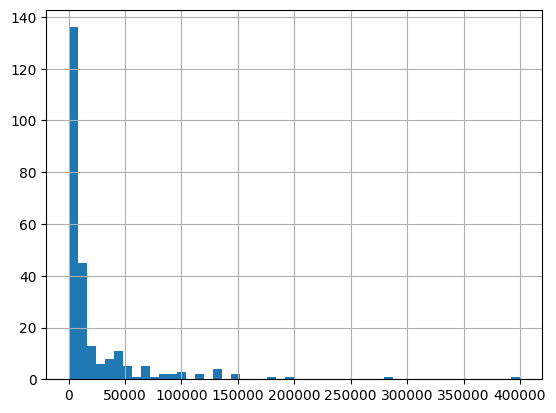

In [33]:
df_out.phi.hist(bins=50);

In [34]:
obs_df = pd.read_csv(os.path.join(m_d,"sweep_out.csv"),index_col=0)
print('number of realization in the ensemble before dropping: ' + str(obs_df.shape[0]))
obs_df = obs_df.loc[obs_df.failed_flag==0,:]
print('number of realization in the ensemble **after** dropping: ' + str(obs_df.shape[0]))

number of realization in the ensemble before dropping: 250
number of realization in the ensemble **after** dropping: 250


[<Figure size 800x1050 with 0 Axes>,
 <Figure size 800x1050 with 8 Axes>,
 <Figure size 800x1050 with 8 Axes>,
 <Figure size 800x1050 with 8 Axes>]

<Figure size 800x1050 with 0 Axes>

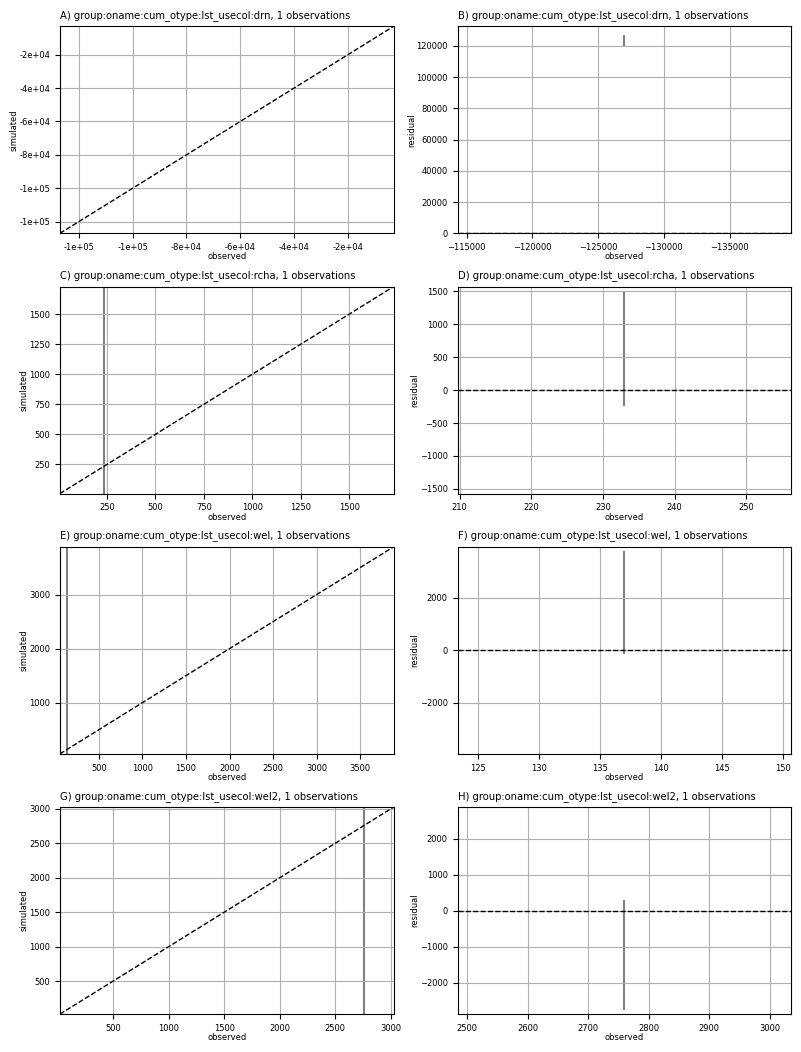

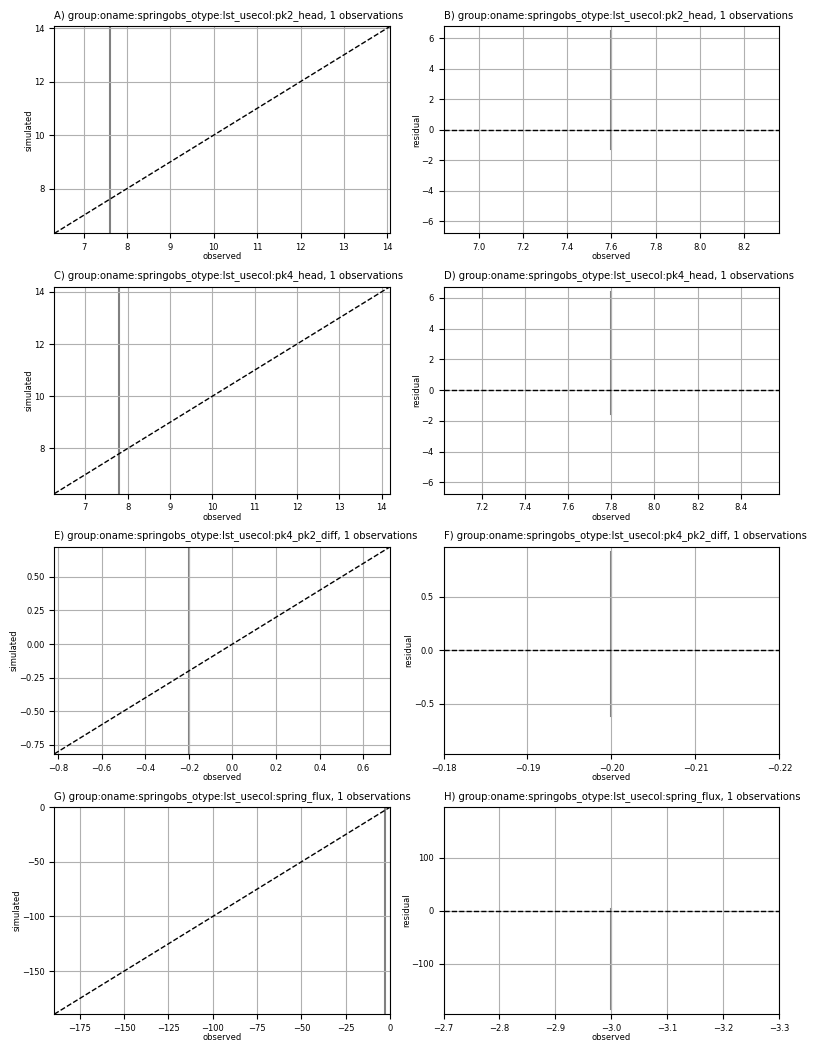

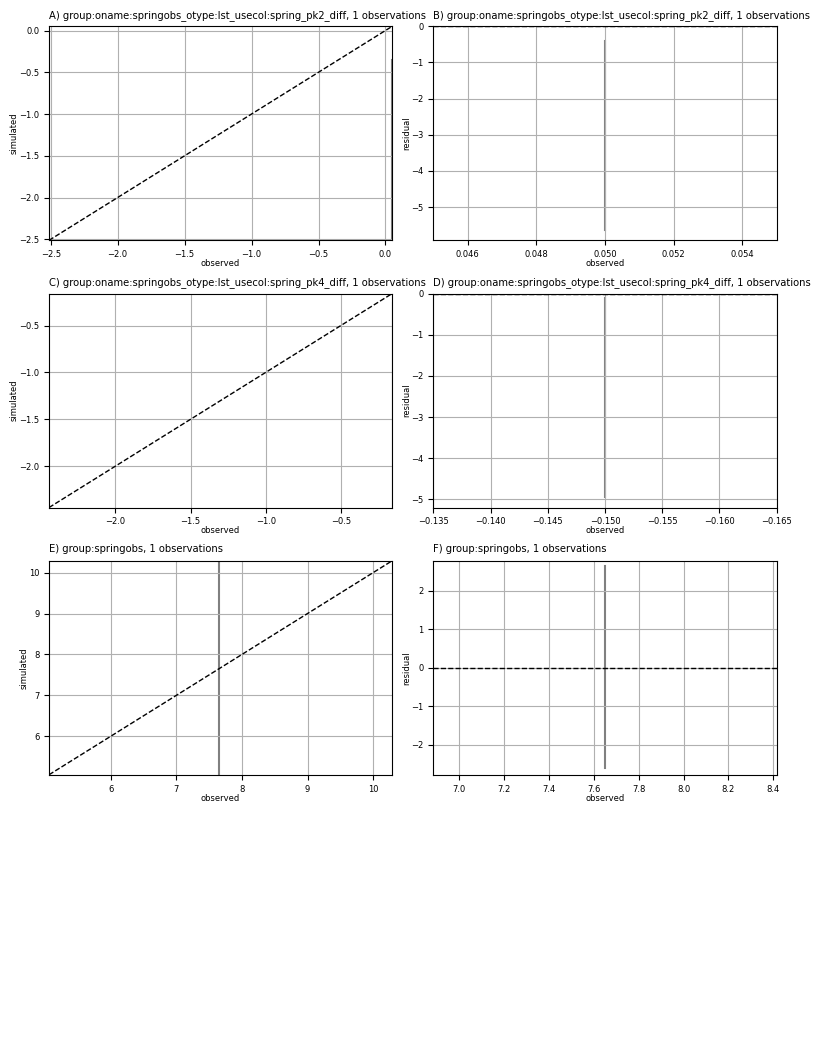

In [35]:
pyemu.plot_utils.ensemble_res_1to1(obs_df, pst)

In [36]:
zero_weighted_obs_groups = [i for i in pst.obs_groups if i not in pst.nnz_obs_groups]
len(zero_weighted_obs_groups)

6

<Figure size 800x1050 with 0 Axes>

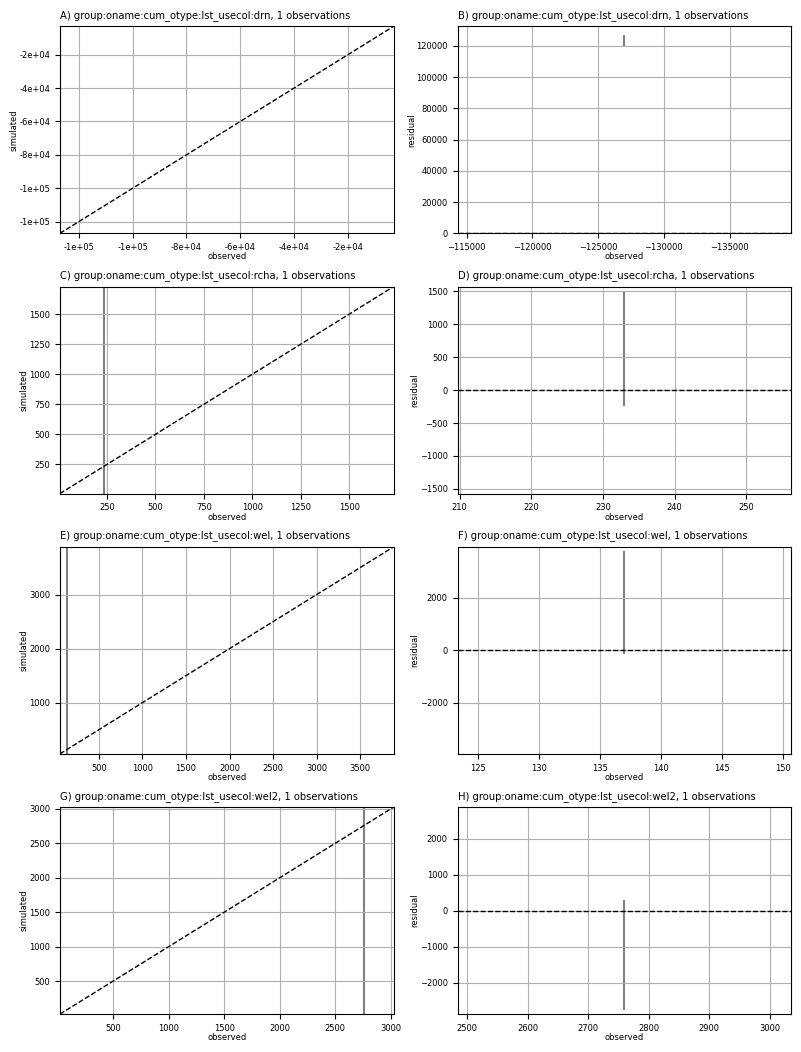

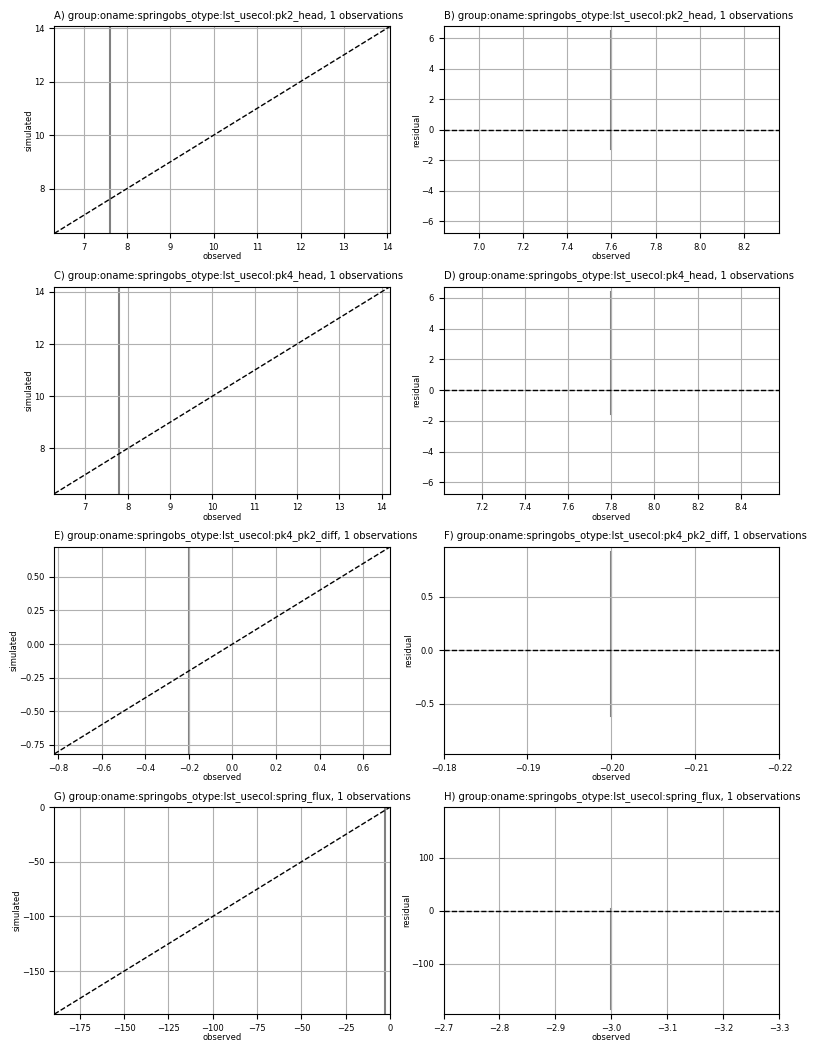

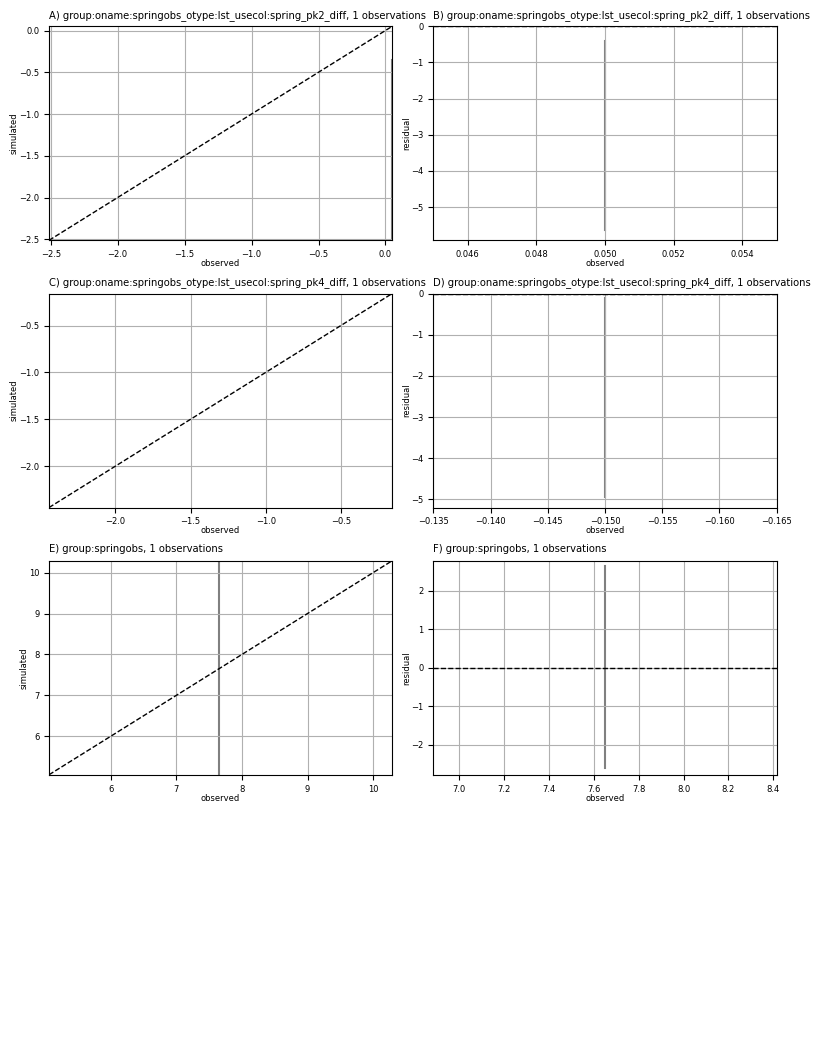

In [37]:
pyemu.plot_utils.ensemble_res_1to1(obs_df, pst, skip_groups=zero_weighted_obs_groups); 

In [38]:
obs_cov = pyemu.Cov.from_binary(os.path.join(r'C:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\examples\manual_builds\models\local1\pest\local1_template', 'obs_cov.jcb'))
obs_plus_noise = pyemu.ObservationEnsemble.from_gaussian_draw(pst=pst, cov=obs_cov);

drawing from group oname:cum_otype:lst_usecol:drn
drawing from group oname:cum_otype:lst_usecol:rcha
drawing from group oname:cum_otype:lst_usecol:wel
drawing from group oname:cum_otype:lst_usecol:wel2
drawing from group oname:springobs_otype:lst_usecol:pk2_head
drawing from group oname:springobs_otype:lst_usecol:pk4_head
drawing from group oname:springobs_otype:lst_usecol:pk4_pk2_diff
drawing from group oname:springobs_otype:lst_usecol:spring_flux
drawing from group oname:springobs_otype:lst_usecol:spring_pk2_diff
drawing from group oname:springobs_otype:lst_usecol:spring_pk4_diff
drawing from group springobs


c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return t

return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame


c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return t

return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame


c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return type uncaught, losing Ensemble type, returning DataFrame
c:\Users\rccuser\Documents\b_model_repos\rapid-gwm-build\.venv\Lib\site-packages\pyemu\en.py:227: PyemuWarning: return t

return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame
return type uncaught, losing Ensemble type, returning DataFrame


<Figure size 800x1050 with 0 Axes>

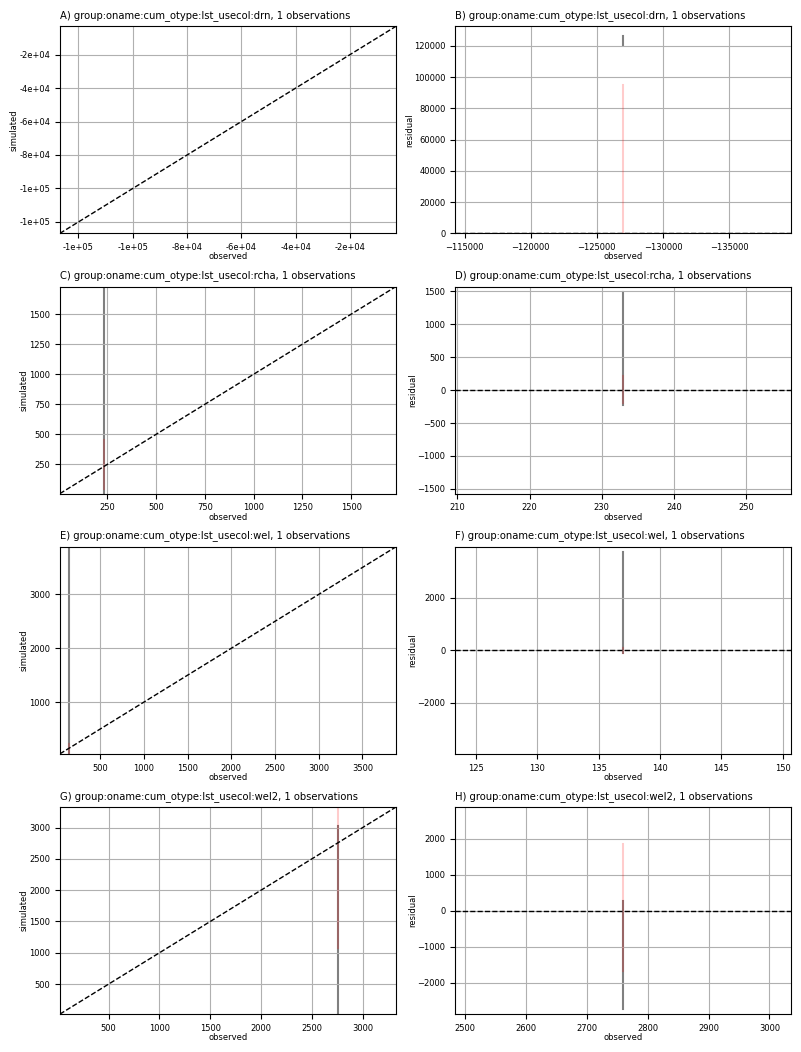

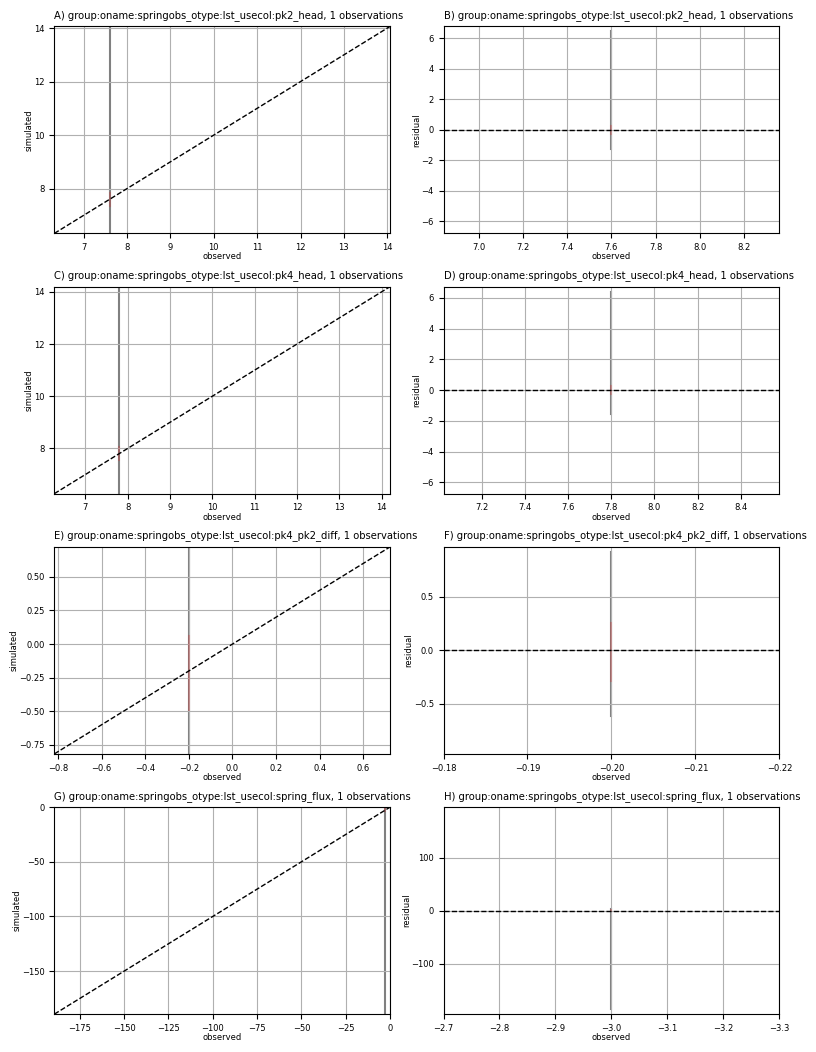

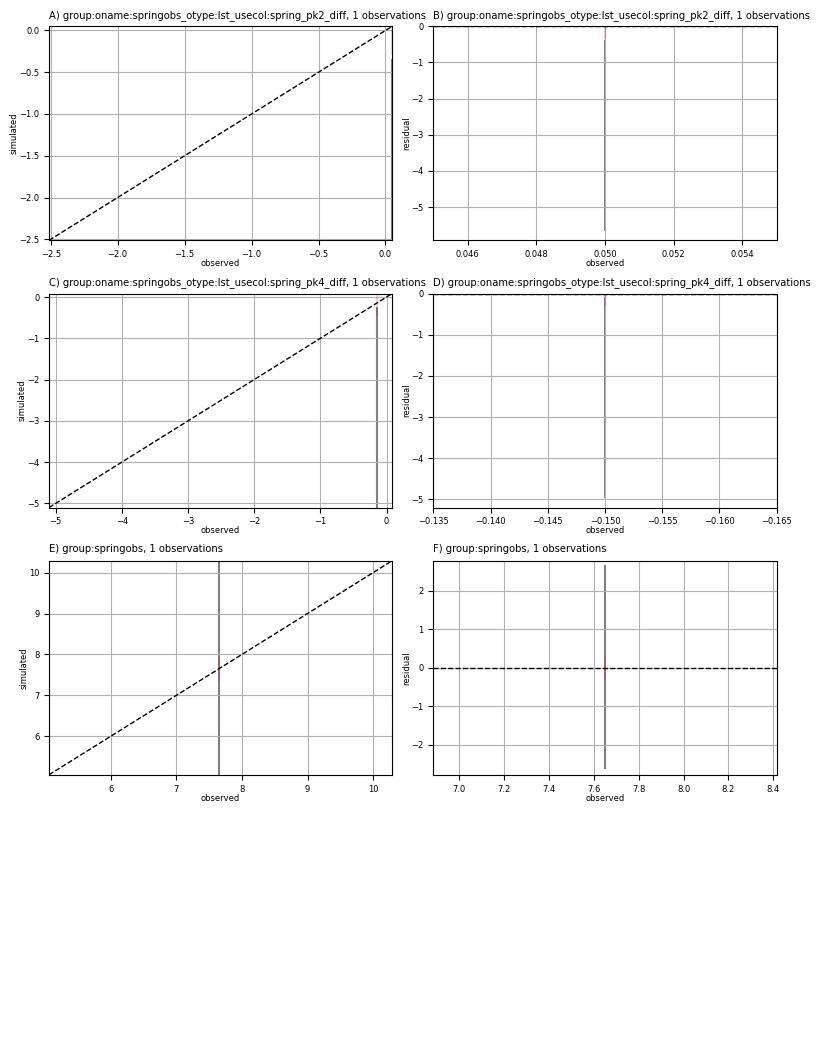

In [39]:
pyemu.plot_utils.ensemble_res_1to1(obs_df,
                                    pst, 
                                    skip_groups=zero_weighted_obs_groups,
                                    base_ensemble=obs_plus_noise); 

<Figure size 800x1050 with 0 Axes>

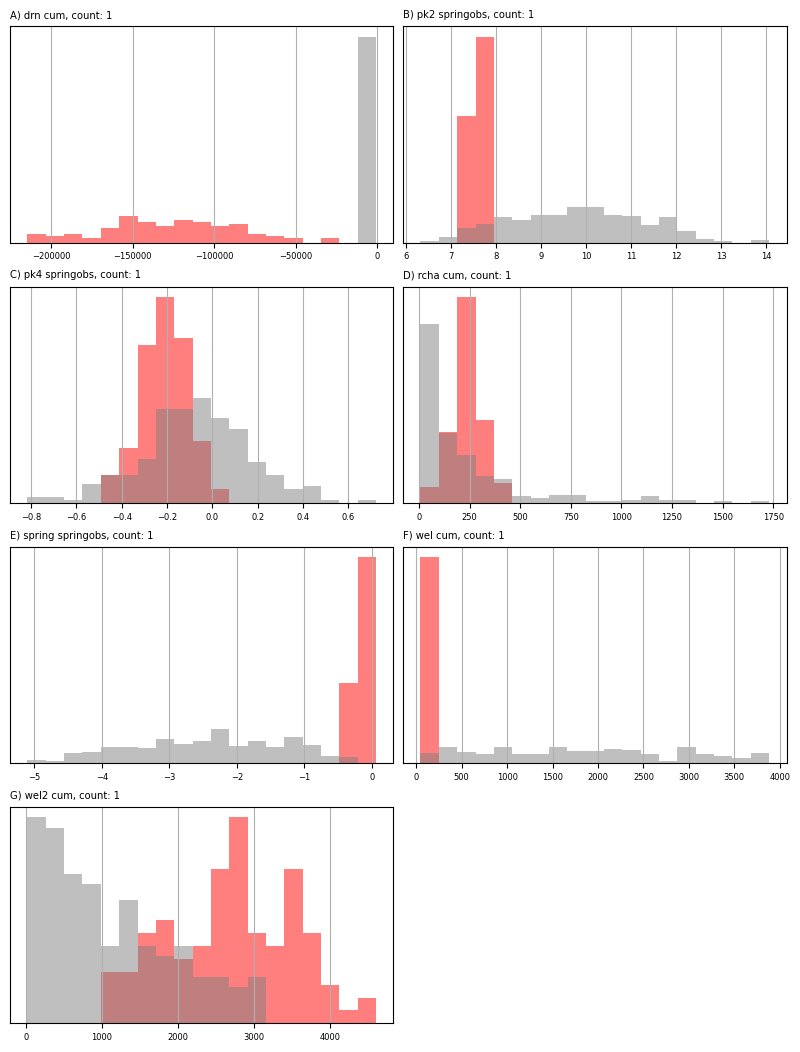

In [40]:
plot_cols = pst.observation_data.loc[pst.nnz_obs_names].apply(lambda x: x.usecol + " "+x.oname,axis=1).to_dict()
plot_cols = {v: [k] for k, v in plot_cols.items()}
pyemu.plot_utils.ensemble_helper({"r":obs_plus_noise,"0.5":obs_df}, 
                                  plot_cols=plot_cols,bins=20,sync_bins=True,
                                  )
plt.show();

In [41]:
obs_df.columns[5:]

Index(['oname:cum_otype:lst_usecol:chd2', 'cum',
       'oname:cum_otype:lst_usecol:drn', 'oname:cum_otype:lst_usecol:in-out',
       'oname:cum_otype:lst_usecol:percent-discrepancy',
       'oname:cum_otype:lst_usecol:rcha', 'oname:cum_otype:lst_usecol:total',
       'oname:cum_otype:lst_usecol:wel2', 'oname:cum_otype:lst_usecol:wel3',
       'oname:cum_otype:lst_usecol:wel',
       'oname:springobs_otype:lst_usecol:pk2_head',
       'oname:springobs_otype:lst_usecol:pk4_head',
       'oname:springobs_otype:lst_usecol:pk4_pk2_diff',
       'oname:springobs_otype:lst_usecol:spring_flux', 'springobs',
       'oname:springobs_otype:lst_usecol:spring_pk2_diff',
       'oname:springobs_otype:lst_usecol:spring_pk4_diff',
       'oname:cum_otype:lst_usecol:chd2_totim:1',
       'oname:cum_otype:lst_usecol:chd_totim:1',
       'oname:cum_otype:lst_usecol:drn_totim:1',
       'oname:cum_otype:lst_usecol:in-out_totim:1',
       'oname:cum_otype:lst_usecol:percent-discrepancy_totim:1',
       'o

In [42]:
pst = pyemu.Pst(os.path.join(m_d, f"{MODEL_NAME}.pst"))
a = pst.observation_data.index.map(lambda x: x)[:10].tolist()
b = pst.observation_data.index.map(lambda x: x)[10:].tolist()
names = a + b


In [43]:
pst.observation_data['names'] = names
pst.observation_data.set_index('names', inplace=True)


In [44]:
pst.observation_data

,obsnme,obsval,weight,obgnme,extra,kper,oname,otype,totim,usecol
names,,,,,,,,,,
oname:cum_otype:lst_usecol:chd2_totim:1,oname:cum_otype:lst_usecol:chd2_totim:1,330.308200,0.000000,oname:cum_otype:lst_usecol:chd2,NaN,NaN,cum,lst,1,chd2
oname:cum_otype:lst_usecol:chd_totim:1,oname:cum_otype:lst_usecol:chd_totim:1,-79.136990,0.000000,cum,NaN,NaN,cum,lst,1,chd
oname:cum_otype:lst_usecol:drn_totim:1,oname:cum_otype:lst_usecol:drn_totim:1,-127000.000000,0.000026,oname:cum_otype:lst_usecol:drn,NaN,NaN,cum,lst,1,drn
oname:cum_otype:lst_usecol:in-out_totim:1,oname:cum_otype:lst_usecol:in-out_totim:1,-31.378600,0.000000,oname:cum_otype:lst_usecol:in-out,NaN,NaN,cum,lst,1,in-out
oname:cum_otype:lst_usecol:percent-discrepancy_totim:1,oname:cum_otype:lst_usecol:percent-discrepancy_totim:1,-1.730000,0.000000,oname:cum_otype:lst_usecol:percent-discrepancy,NaN,NaN,cum,lst,1,percent-discrepancy
oname:cum_otype:lst_usecol:rcha_totim:1,oname:cum_otype:lst_usecol:rcha_totim:1,233.000000,0.014300,oname:cum_otype:lst_usecol:rcha,NaN,NaN,cum,lst,1,rcha
oname:cum_otype:lst_usecol:total_totim:1,oname:cum_otype:lst_usecol:total_totim:1,-31.378662,0.000000,oname:cum_otype:lst_usecol:total,NaN,NaN,cum,lst,1,total
oname:cum_otype:lst_usecol:wel2_totim:1,oname:cum_otype:lst_usecol:wel2_totim:1,2760.000000,0.001210,oname:cum_otype:lst_usecol:wel2,NaN,NaN,cum,lst,1,wel2
oname:cum_otype:lst_usecol:wel3_totim:1,oname:cum_otype:lst_usecol:wel3_totim:1,-282.000000,0.000000,oname:cum_otype:lst_usecol:wel3,NaN,NaN,cum,lst,1,wel3


oname:cum_otype:lst_usecol:chd2_totim:1
oname:cum_otype:lst_usecol:chd_totim:1
oname:cum_otype:lst_usecol:in-out_totim:1
oname:cum_otype:lst_usecol:percent-discrepancy_totim:1
oname:cum_otype:lst_usecol:rcha_totim:1
oname:cum_otype:lst_usecol:total_totim:1
oname:cum_otype:lst_usecol:wel2_totim:1
oname:cum_otype:lst_usecol:wel3_totim:1
oname:cum_otype:lst_usecol:wel_totim:1
oname:springobs_otype:lst_usecol:pk2_head_kper:0
oname:springobs_otype:lst_usecol:pk4_head_kper:0
oname:springobs_otype:lst_usecol:pk4_pk2_diff_kper:0
oname:springobs_otype:lst_usecol:spring_flux_kper:0
oname:springobs_otype:lst_usecol:spring_head_kper:0
oname:springobs_otype:lst_usecol:spring_pk2_diff_kper:0
oname:springobs_otype:lst_usecol:spring_pk4_diff_kper:0


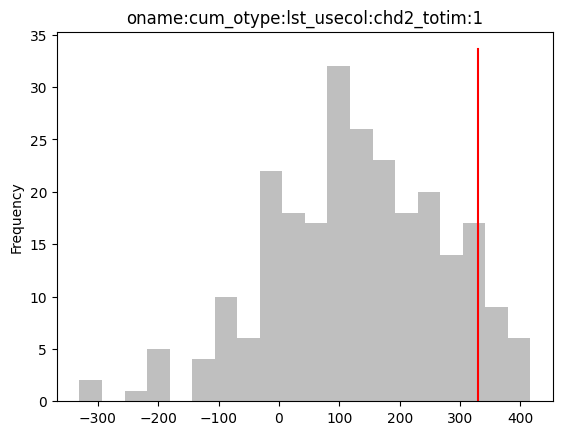

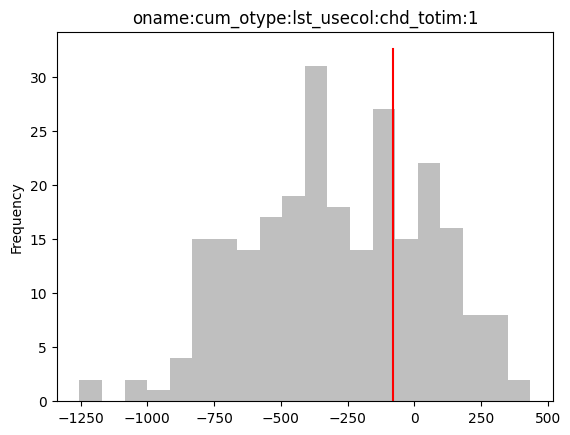

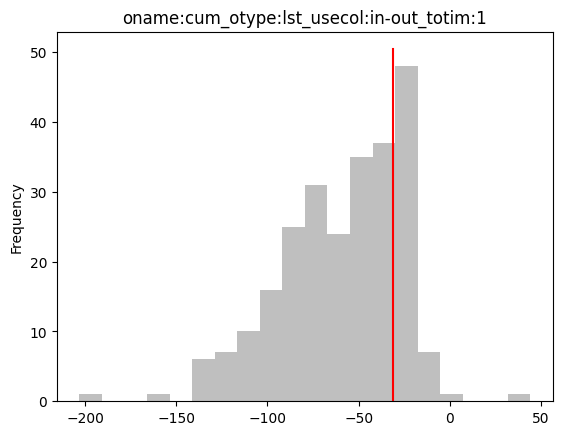

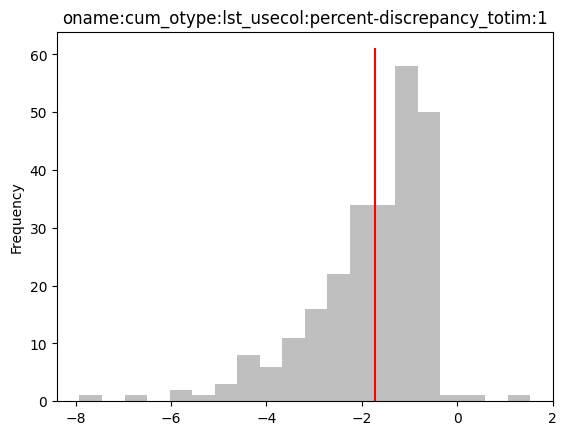

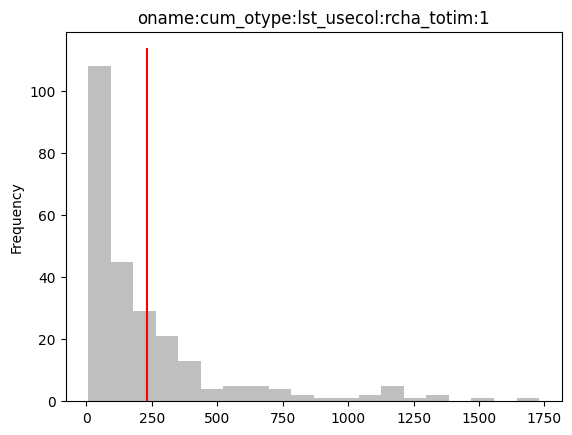

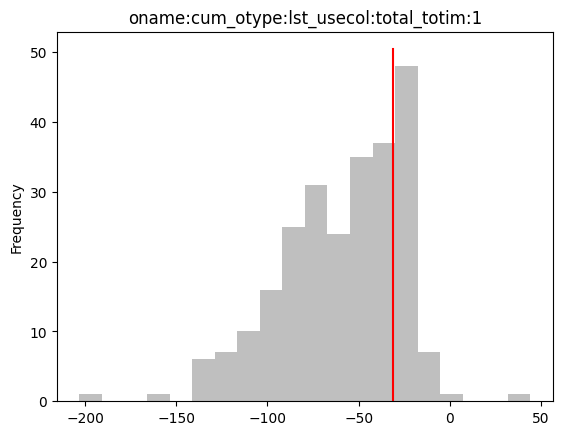

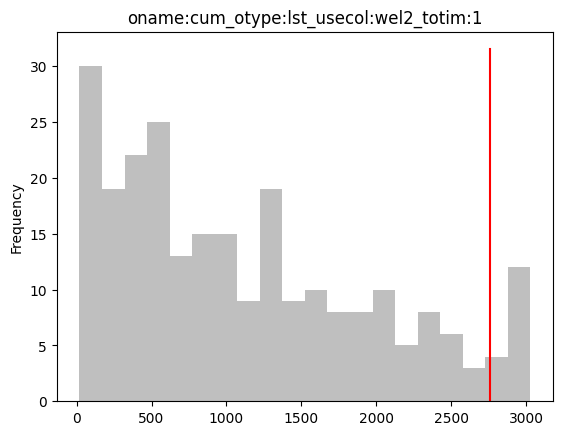

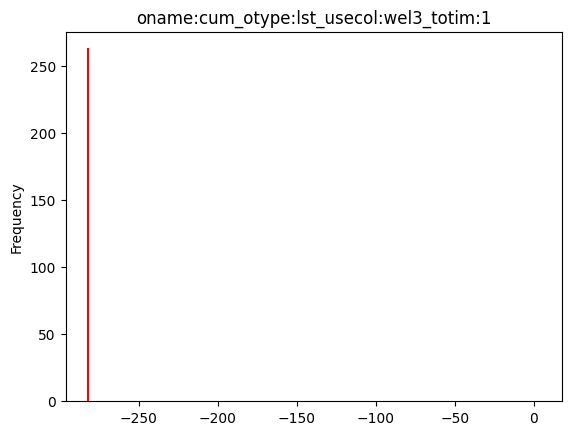

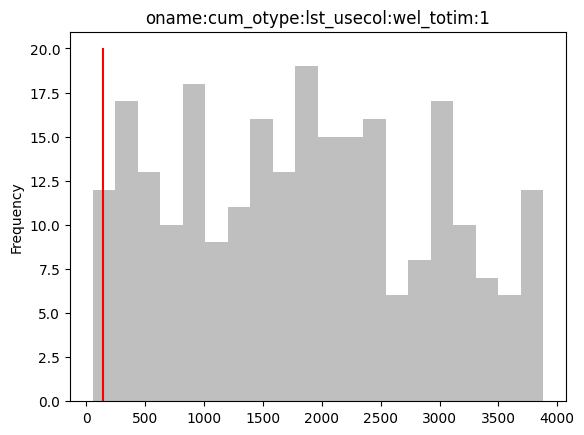

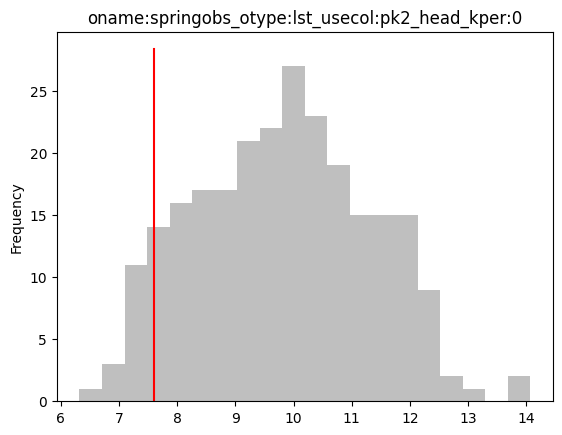

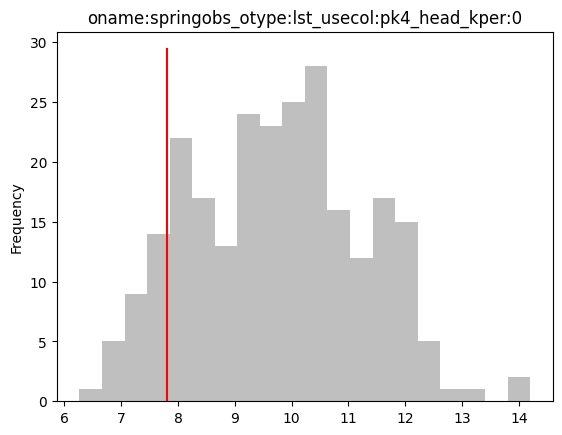

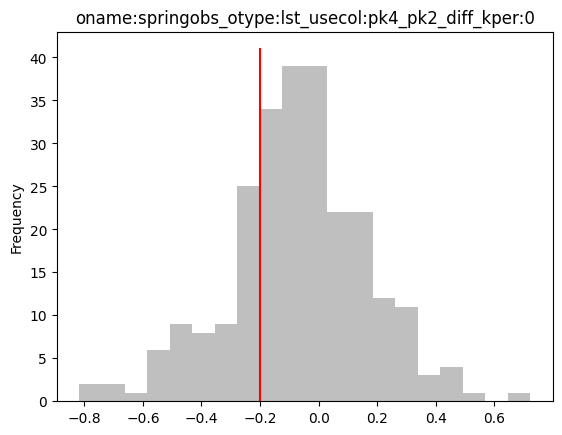

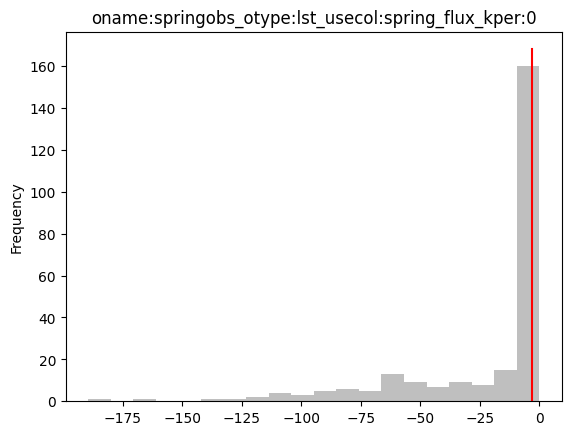

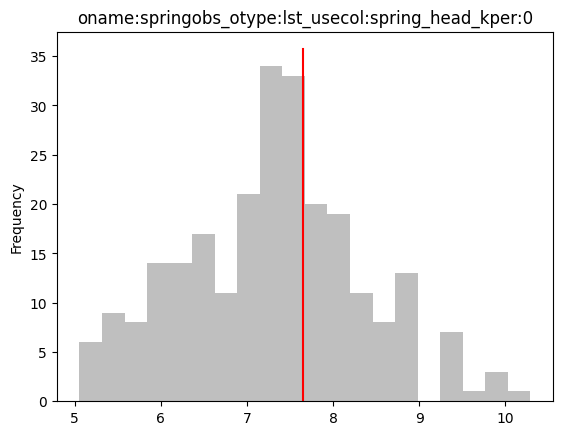

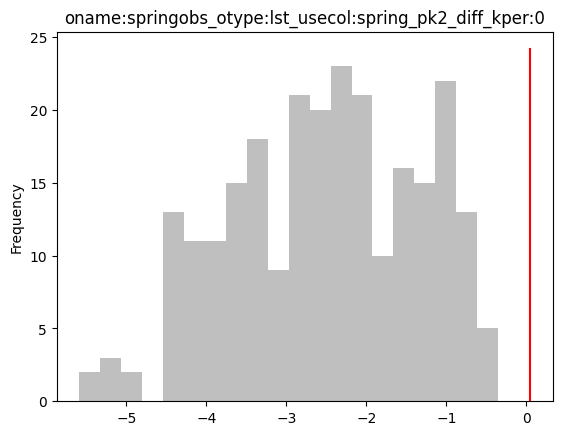

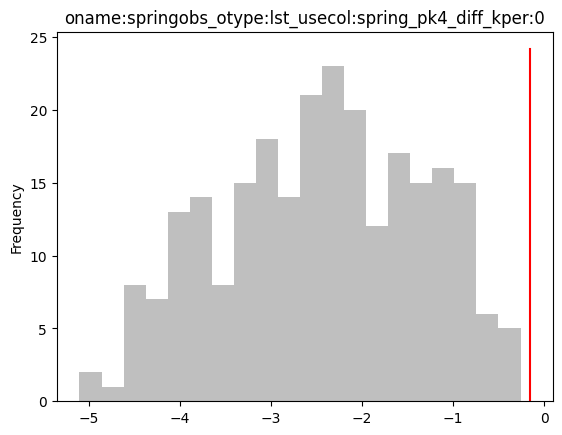

In [45]:
# forcasts
for forecast in obs_df.columns[5:]:
    if forecast not in ['cum', 'springobs', 'oname:cum_otype:lst_usecol:drn_totim:1']:
        try:
            fval = pst.observation_data.loc[forecast,"obsval"]
            print(forecast)
            plt.figure()
            ax = obs_df.loc[:,forecast].plot(kind="hist",color="0.5",alpha=0.5, bins=20)
            ax.set_title(forecast)
            ax.plot([fval,fval],ax.get_ylim(),"r-")
        except:
            continue

# other

In [46]:
acceptable_phi = pst.phi * 2
good_enough = df_out.loc[df_out.phi<acceptable_phi].index.values
print("number of good enough realisations:", good_enough.shape[0])

number of good enough realisations: 51


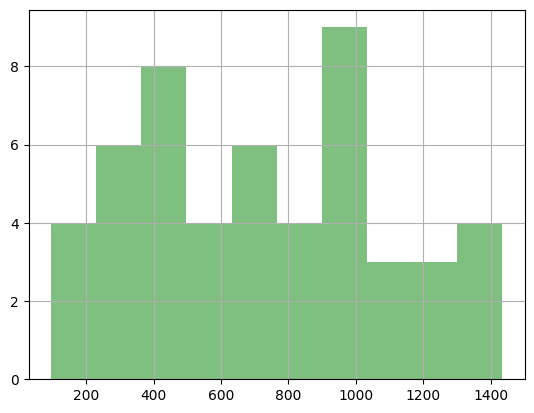

In [47]:
# ax = df_out.phi.hist(alpha=0.5)
# ax = df_out.phi.hist(bins=50, alpha=0.5);
df_out.loc[good_enough,"phi"].hist(color="g",alpha=0.5)
plt.show()

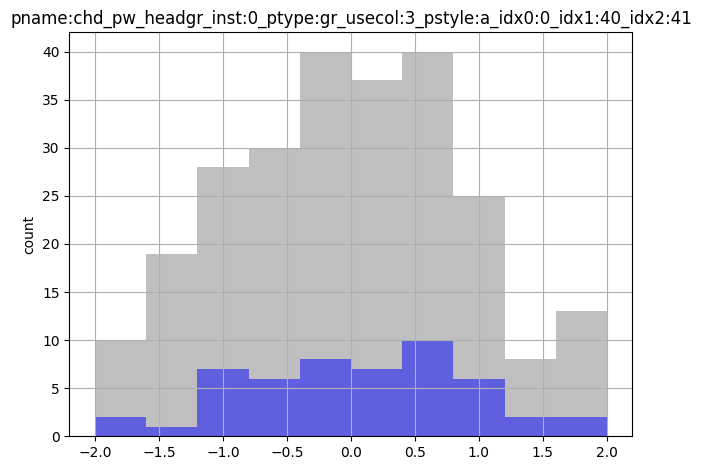

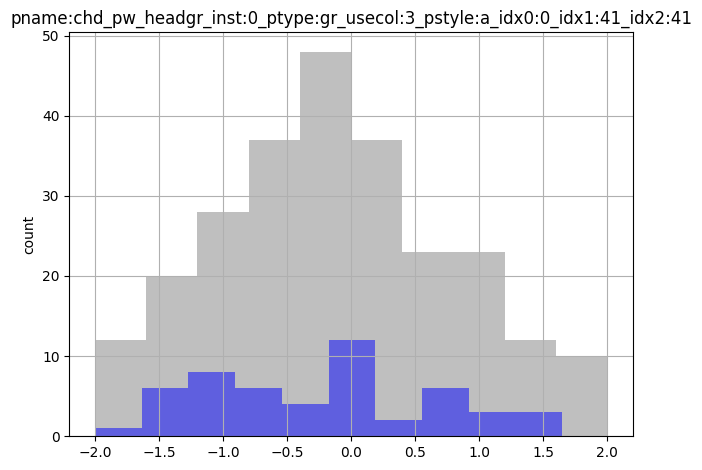

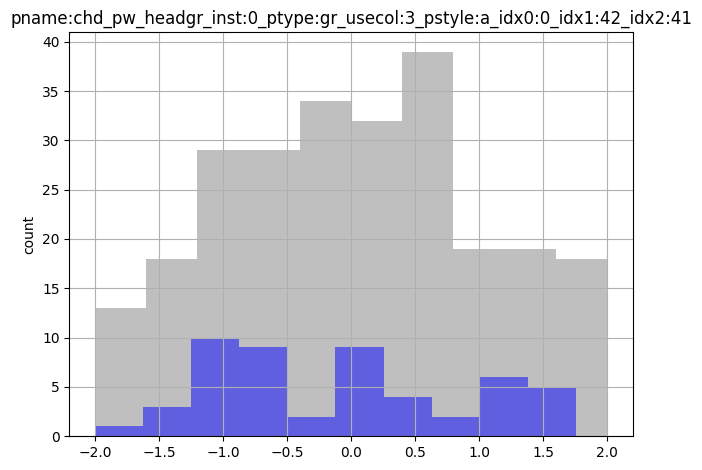

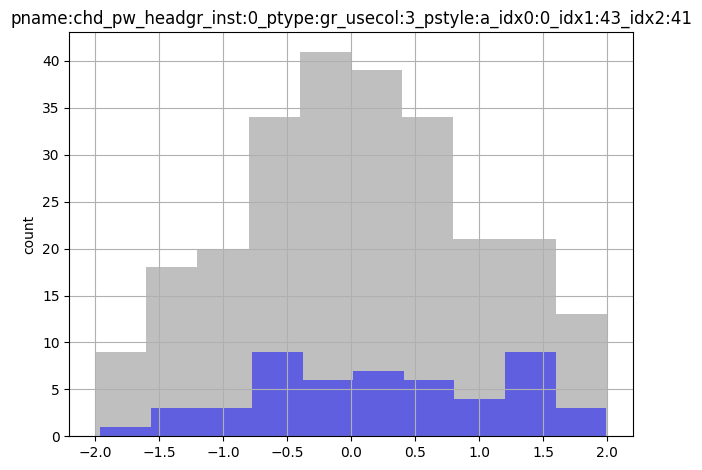

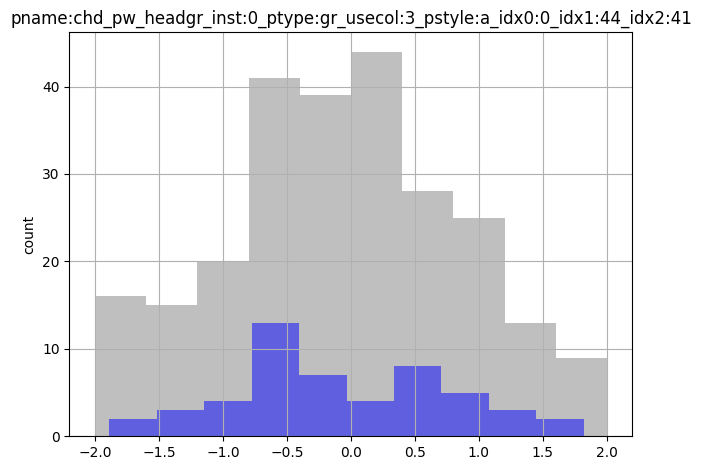

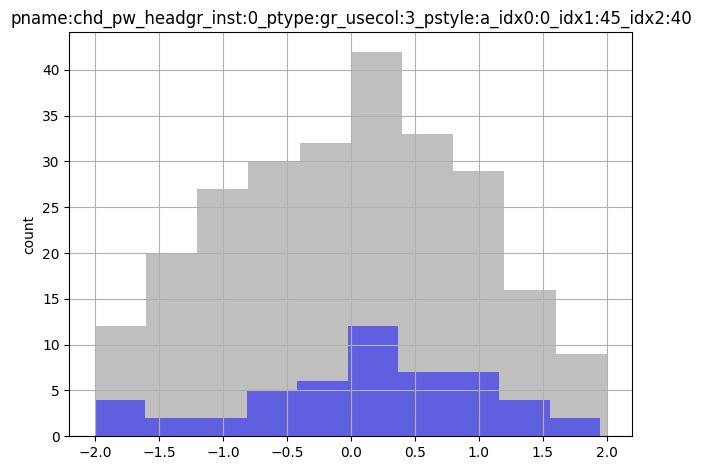

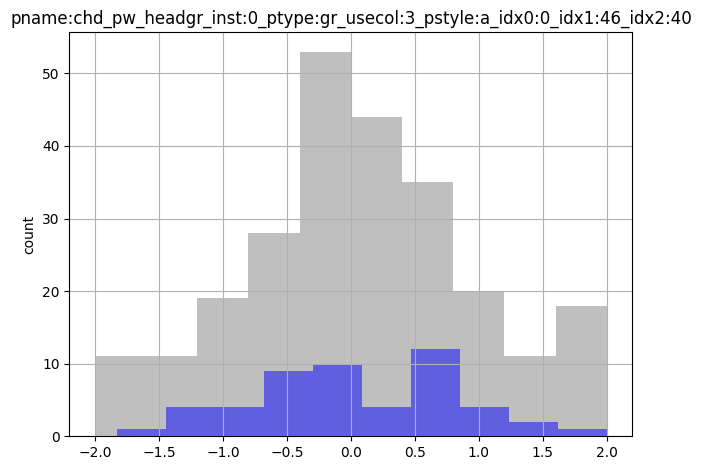

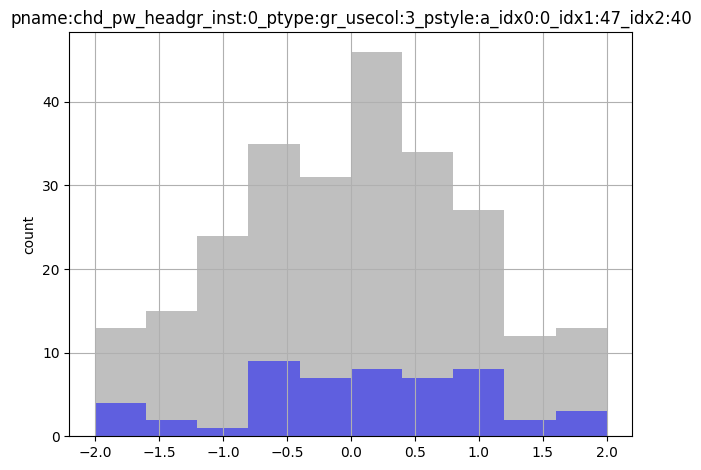

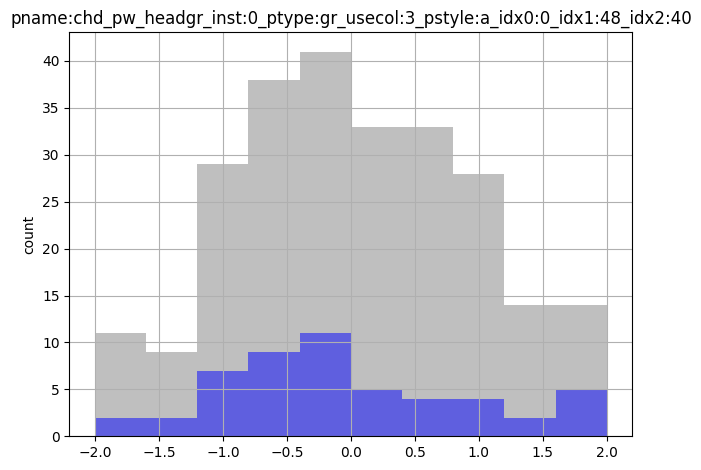

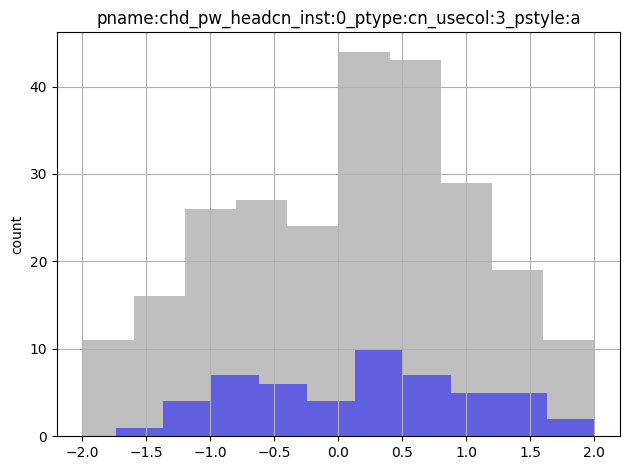

In [48]:
prior_cov = pyemu.Cov.from_parameter_data(pst)
parensemble = pyemu.ParameterEnsemble.from_gaussian_draw(pst=pst, cov=prior_cov, num_reals=250)
# ensure that the samples respect parameter bounds in the pst control file
parensemble.enforce()

for parnme in pst.par_names[-10:]:
    ax = plt.subplot(111)
    parensemble.loc[:,parnme].hist(bins=10,alpha=0.5,color="0.5",ax=ax,)
    parensemble.loc[good_enough,parnme].hist(bins=10,alpha=0.5,color="b",ax=ax,)   
    ax.set_title(parnme)
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()

In [49]:
pst